In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from pycaret.clustering import *
from sklearn.datasets import make_blobs

mpl.rcParams['figure.dpi'] = 72

In [30]:
cols = ['c1', 'c2', 'c3', 'c4', 'c5', 'c6']
arr = make_blobs(n_samples = 1500, n_features = 6, centers = 5, random_state=42)
data = pd.DataFrame(data = arr[0], columns = cols)
data.head()

,c1,c2,c3,c4,c5,c6
0,5.521357,-4.625309,-6.209007,-6.668462,-3.935029,0.387864
1,-2.147562,8.369166,5.001274,3.511206,-6.915453,-5.315466
2,6.506706,-5.414530,-5.334043,-5.459594,-5.058174,1.315287
3,-1.062220,9.210841,5.671723,0.487609,-6.612577,-5.990479
4,0.003797,6.730999,-4.032446,0.661952,1.661064,-8.038334


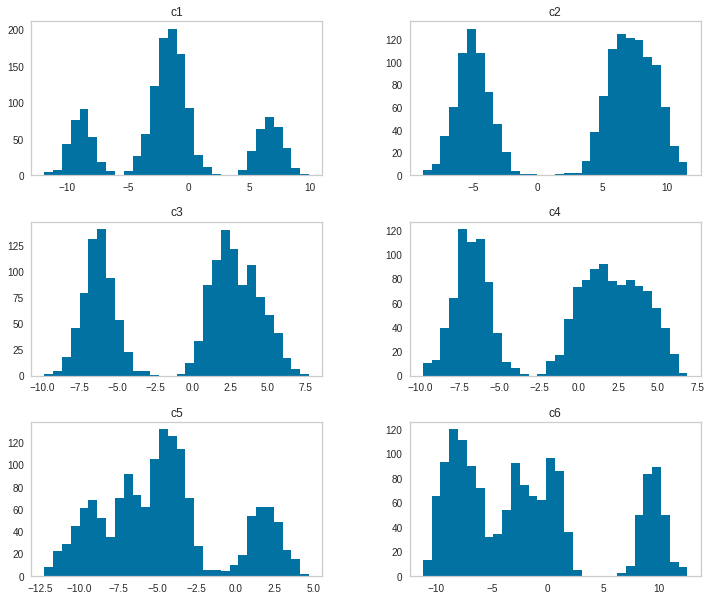

In [31]:
data.hist(bins = 30, figsize = (12, 10), grid = False)
plt.show()

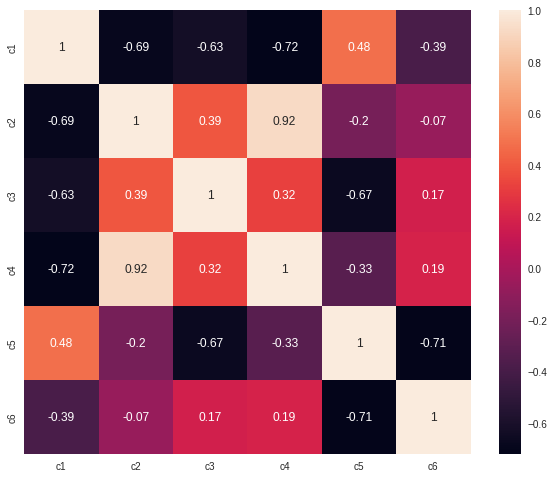

In [32]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr().round(decimals=2), annot=True)
plt.show()

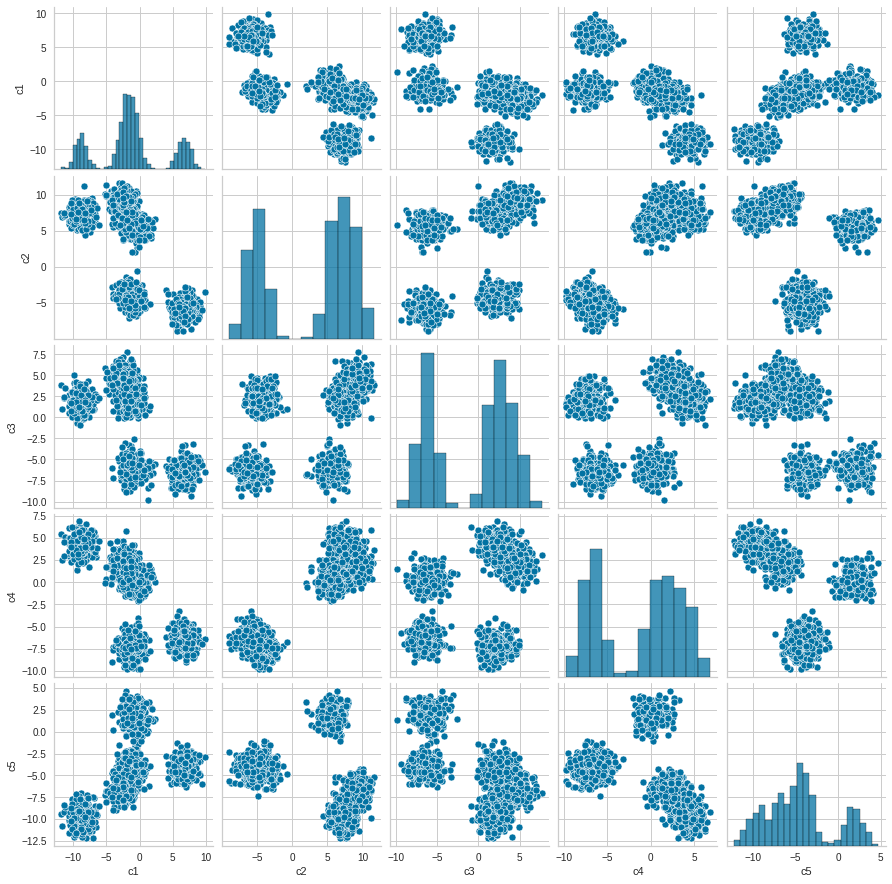

In [33]:
sns.pairplot(data, kind='scatter', vars=data.columns[:-1])
plt.show()

In [34]:
cluster = setup(data, session_id = 1337)

,Description,Value
0,Session id,1337
1,Original data shape,"(1500, 6)"
2,Transformed data shape,"(1500, 6)"
3,Numeric features,6
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


In [40]:
model = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6954,3436.2563,0.4685,0,0,0


Коэффициент Silhouette = 0.69

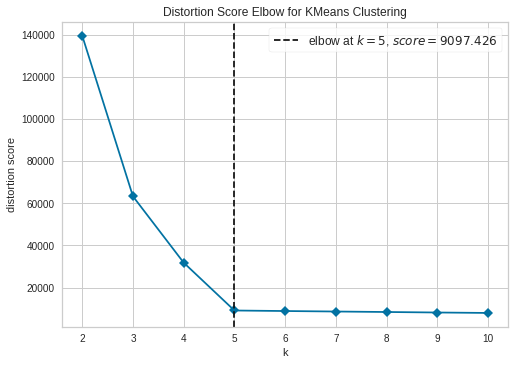

In [36]:
plot_model(model, 'elbow')

In [43]:
model = create_model('kmeans', num_clusters = 5)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7670,9936.3967,0.3362,0,0,0


Коэффициент Silhouette = 0.77


In [38]:
plot_model(model, 'cluster')

In [39]:
save_model(model, 'clustering_model')
results = assign_model(model)
results.head(10)

Transformation Pipeline and Model Successfully Saved


,c1,c2,c3,c4,c5,c6,Cluster
0,5.521357,-4.625309,-6.209007,-6.668462,-3.935029,0.387864,Cluster 4
1,-2.147562,8.369166,5.001275,3.511206,-6.915453,-5.315466,Cluster 0
2,6.506706,-5.414530,-5.334043,-5.459594,-5.058175,1.315287,Cluster 4
3,-1.062220,9.210841,5.671723,0.487609,-6.612577,-5.990479,Cluster 0
4,0.003797,6.730999,-4.032445,0.661952,1.661064,-8.038334,Cluster 2
5,-2.101590,-3.310593,2.388461,-6.911671,-4.939706,-1.965731,Cluster 1
6,-0.338255,8.838400,4.763083,2.524655,-6.836025,-5.185059,Cluster 0
7,-4.194130,-2.816228,2.997564,-8.953071,-4.764676,-1.104581,Cluster 1
8,7.999705,-6.406897,-7.169878,-6.256215,-3.229565,0.353480,Cluster 4
9,6.457981,-5.951414,-5.853343,-5.059340,-3.788841,0.025998,Cluster 4
